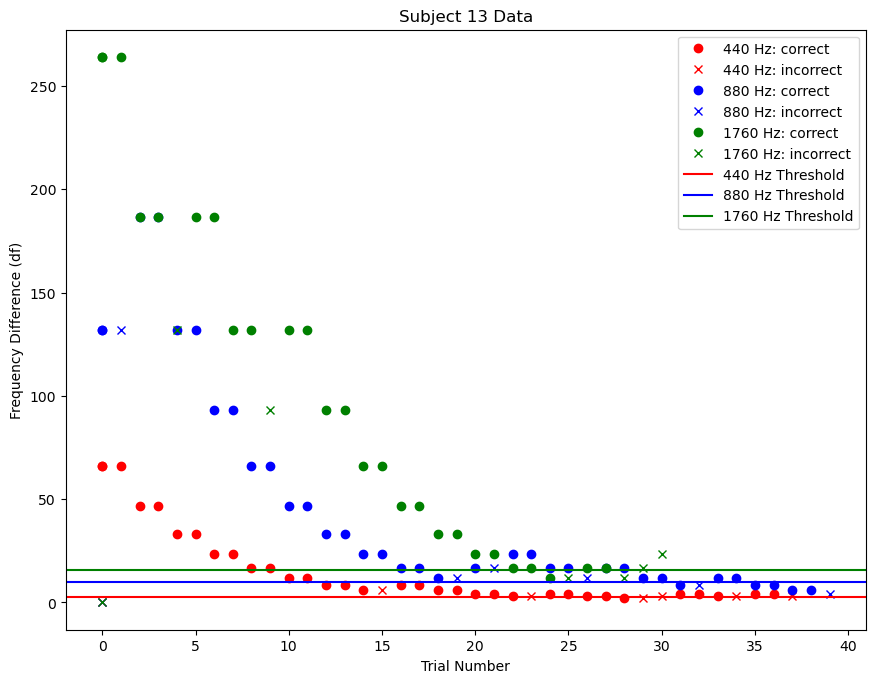

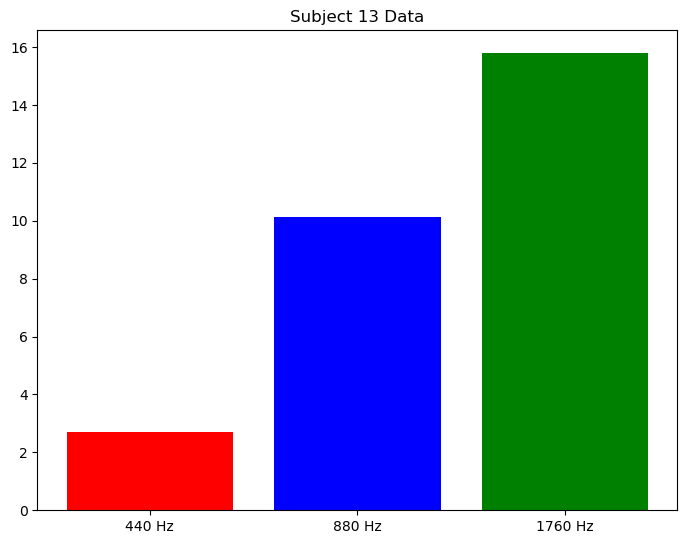

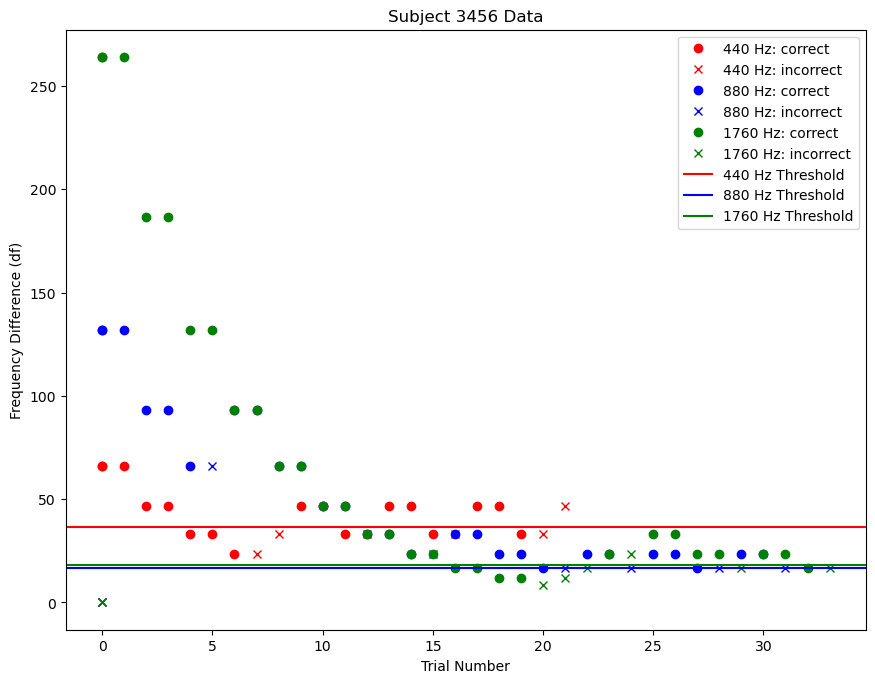

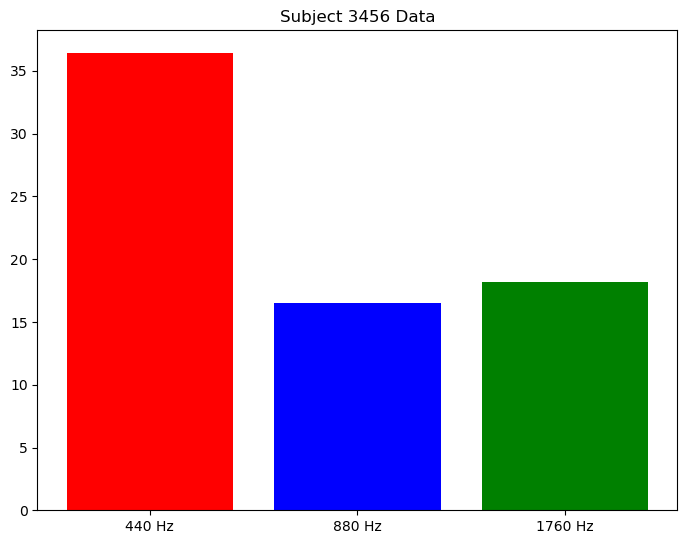

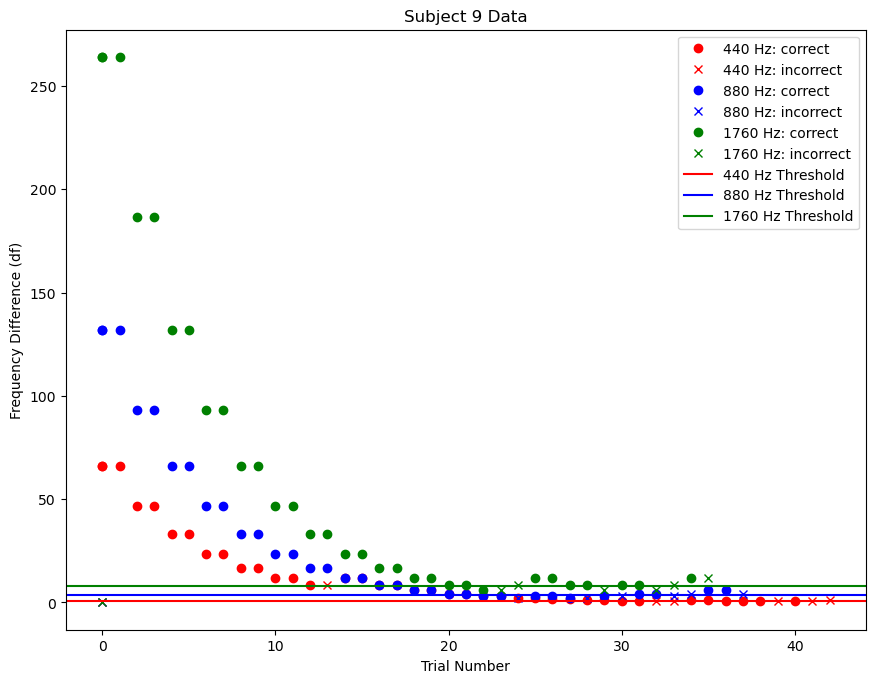

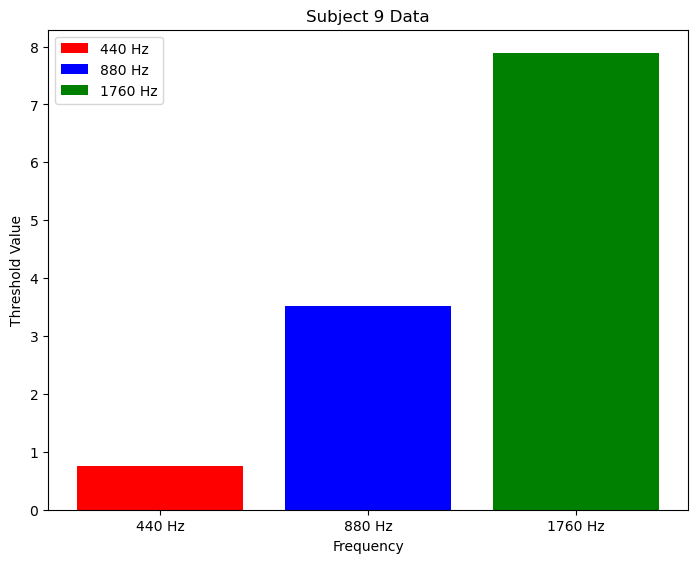

In [15]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


def letRead(filename):

    experimental_data = pd.read_csv(filename) #name of csv file

    base_frequency = np.array(experimental_data['Base Frequency (f_A)'])
    frequency_difference = np.array(experimental_data['Frequency Difference (df)'])
    user_response = np.array(experimental_data['User Response'])
    correct_answer = np.array(experimental_data['Correct Answer'])
    subjid = np.array(experimental_data['Subject ID'])

    base_frequency_s440t = []
    base_frequency_s440f = []
    base_frequency_s880t = []
    base_frequency_s880f = []
    base_frequency_s1760t = []
    base_frequency_s1760f = []

    flub = 0
    #extracting the data
    for n in range(0,len(base_frequency)):
        if base_frequency[n] == 440:
            if user_response[n] == correct_answer[n]:
                base_frequency_s440t.append(frequency_difference[n])
                base_frequency_s440f.append(flub) #makes sure that the index for each list is still the same
            else: #incorrect answers
                base_frequency_s440t.append(flub) #adds a 0 to part where answer is incorrect in list
                base_frequency_s440f.append(frequency_difference[n])
        elif base_frequency[n] == 880:
            if user_response[n] == correct_answer[n]:
                base_frequency_s880t.append(frequency_difference[n])
                base_frequency_s880f.append(flub)
            else:
                base_frequency_s880t.append(flub)
                base_frequency_s880f.append(frequency_difference[n])
        elif base_frequency[n] == 1760:
            if user_response[n] == correct_answer[n]:
                base_frequency_s1760t.append(frequency_difference[n])
                base_frequency_s1760f.append(flub)
            else:
                base_frequency_s1760t.append(flub)
                base_frequency_s1760f.append(frequency_difference[n])

    #calculating threshold

    t440 = []
    t880 = []
    t1760 = []

    for n in range(0, len(correct_answer)):
        if base_frequency[n] == 440:
            if user_response[n] != correct_answer[n]:
                t440.append(frequency_difference[n])
        elif base_frequency[n] == 880:
            if user_response[n] != correct_answer[n]:
                t880.append(frequency_difference[n])
        elif base_frequency[n] == 1760:
            if user_response[n] != correct_answer[n]:
                t1760.append(frequency_difference[n])

    sum440 = t440[2] + t440[3] + t440[4] + t440[5]
    threshold440 = sum440/4
    sum880 = t880[2] + t880[3] + t880[4] + t880[5]
    threshold880 = sum880/4
    sum1760 = t1760[2] + t1760[3] + t1760[4] + t1760[5]
    threshold1760 = sum1760/4

    #keeps the length of both so the plot is not weird
    trial440len = []
    for n in range(0, len(base_frequency_s440t)):
        trial440len.append(n)

    trial880len = []
    for n in range(0, len(base_frequency_s880t)):
        trial880len.append(n)

    trial1760len = []
    for n in range(0, len(base_frequency_s1760t)):
        trial1760len.append(n)

    #for the plots
    fig = plt.figure(figsize = (8,6))
    ax = fig.add_axes([1,1,1,1])

    ax.plot(trial440len[0], base_frequency_s440t[0], 'ro', label = '440 Hz: correct')
    ax.plot(trial440len[0], base_frequency_s440f[0], 'rx', label = '440 Hz: incorrect')
    ax.plot(trial880len[0], base_frequency_s880t[0], 'bo', label = '880 Hz: correct')
    ax.plot(trial880len[0], base_frequency_s880f[0], 'bx', label = '880 Hz: incorrect')
    ax.plot(trial1760len[0], base_frequency_s1760t[0], 'go', label = '1760 Hz: correct')
    ax.plot(trial1760len[0], base_frequency_s1760f[0], 'gx', label = '1760 Hz: incorrect')

    for i in range(0,len(trial440len)):
        if base_frequency_s440t[i] != 0:
            ax.plot(trial440len[i], base_frequency_s440t[i], 'ro')
        else:
            ax.plot(trial440len[i], base_frequency_s440f[i], 'rx')

    for i in range(0,len(trial880len)):
        if base_frequency_s880t[i] != 0:
            ax.plot(trial880len[i], base_frequency_s880t[i], 'bo')
        else:
            ax.plot(trial880len[i], base_frequency_s880f[i], 'bx')

    for i in range(0,len(trial1760len)):
        if base_frequency_s1760t[i] != 0:
            ax.plot(trial1760len[i], base_frequency_s1760t[i], 'go')
        else:
            ax.plot(trial1760len[i], base_frequency_s1760f[i], 'gx')

    ax.axhline(y=threshold440, color = 'r', linestyle = '-', label = '440 Hz Threshold' )
    ax.axhline(y=threshold880, color = 'b', linestyle = '-', label = '880 Hz Threshold' )
    ax.axhline(y=threshold1760, color = 'g', linestyle = '-', label = '1760 Hz Threshold' )

    if filename == '13_data.csv':
        ax.set_title('Subject 13 Data')
        ax.set_xlabel('Trial Number') 
        ax.set_ylabel('Frequency Difference (df)')
        ax.legend()
        plt.show()
    elif filename == '3456_data.csv':
        ax.set_title('Subject 3456 Data')
        ax.set_xlabel('Trial Number') 
        ax.set_ylabel('Frequency Difference (df)')
        ax.legend()
        plt.show()
    elif filename == '9_data.csv':
        ax.set_title('Subject 9 Data')
        ax.set_xlabel('Trial Number') 
        ax.set_ylabel('Frequency Difference (df)')
        ax.legend()
        plt.show()

#bar graph
    sample1frequency = [threshold440,threshold880,threshold1760]
    frequency = ['440 Hz', '880 Hz', '1760 Hz']
    bar_colors = ['red', 'blue', 'green']

    fig = plt.figure()   
    ax = fig.add_axes([0,0,1,1])
    ax.bar(frequency,sample1frequency, label = frequency, color = bar_colors)
    plt.show

    if filename == '13_data.csv':
        ax.set_title('Subject 13 Data')
    elif filename == '3456_data.csv':
        ax.set_title('Subject 3456 Data')
    else:
        ax.set_title('Subject 9 Data')
        ax.set_xlabel('Frequency')
        ax.set_ylabel('Threshold Value')
        ax.legend()
    
#reads each file
letRead('13_data.csv')
letRead('3456_data.csv')
letRead('9_data.csv')



